In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
0,2529604,28.04.2019,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
1,2529605,29.04.2019,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [3]:
#Filter data for regression
df_reg=df[["QTY","Total Price"]]

In [4]:
#Checking if we have missing data
df_reg.isnull().sum()

QTY            0
Total Price    0
dtype: int64

In [6]:
#Lets set up a regression expirement
exp = setup(data=df_reg, target='QTY', 
            session_id=123, 
            train_size=0.7, 
            normalize=True, 
            polynomial_features=True, 
            polynomial_degree=2)

,Description,Value
0,Session id,123
1,Target,QTY
2,Target type,Regression
3,Original data shape,"(7811, 2)"
4,Transformed data shape,"(7811, 3)"
5,Transformed train set shape,"(5467, 3)"
6,Transformed test set shape,"(2344, 3)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [7]:
#Compare best models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,180.8807,148146.6333,384.3561,0.6615,0.8210,1.1133,0.9580
lar,Least Angle Regression,180.8807,148146.6414,384.3561,0.6615,0.8210,1.1133,0.0200
br,Bayesian Ridge,180.8603,148148.7853,384.3592,0.6615,0.8195,1.1096,0.0190
ridge,Ridge Regression,180.8393,148149.3440,384.3601,0.6614,0.8178,1.1058,0.0190
lasso,Lasso Regression,180.5474,148211.4090,384.4479,0.6612,0.7875,1.0465,0.0190
catboost,CatBoost Regressor,179.9429,149273.9672,385.8416,0.6577,0.7259,1.2534,0.2110
lightgbm,Light Gradient Boosting Machine,181.2592,150900.9454,387.8840,0.6544,0.7599,1.3254,0.1860
huber,Huber Regressor,177.2916,151762.8113,388.9862,0.6534,0.7703,0.9196,0.0230
par,Passive Aggressive Regressor,177.6318,153376.7268,390.9379,0.6491,0.7586,0.8796,0.0200
ada,AdaBoost Regressor,196.0173,155453.1281,393.9740,0.6431,1.0736,2.8148,0.0420


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
#Lets predict data
predictions = predict_model(best_model, data=df_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,180.6781,146560.9738,382.8328,0.6651,0.8142,1.1004


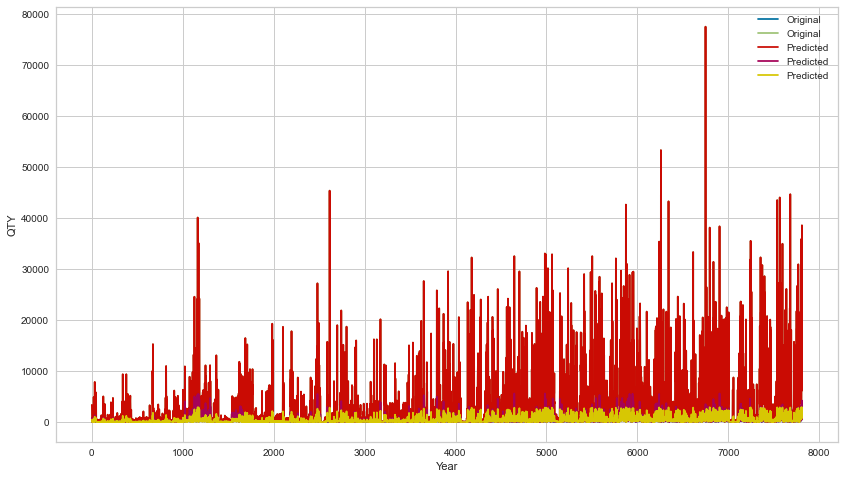

In [13]:
#Finally lets plot regression model
plt.figure(figsize=(14, 8))
plt.plot(df_reg, label='Original')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('QTY')
plt.legend()
plt.show()